In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [90]:
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_test.csv
! wget --no-check-certificate -P ./ -N https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_train.csv

--2018-11-09 14:47:08--  https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_test.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.49
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98797998 (94M) [text/csv]
Server file no newer than local file ‘./fmnist_test.csv’ -- not retrieving.

--2018-11-09 14:47:08--  https://s3.ap-northeast-2.amazonaws.com/mjgim/fmnist_train.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.49
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1099000000 (1.0G) [text/csv]
Server file no newer than local file ‘./fmnist_train.csv’ -- not retrieving.



In [91]:
training_data = np.loadtxt('./fmnist_train.csv', delimiter=",")
training_img = training_data[:,1:]
training_lab = training_data[:,0]

test_img = np.loadtxt('./fmnist_test.csv', delimiter=",")

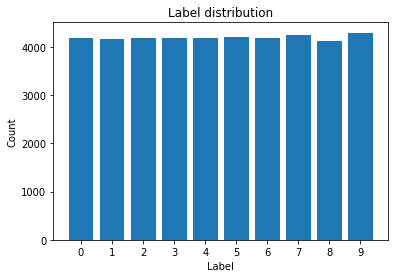

In [64]:
# plot label distribution of training set

plt.title('Label distribution')
plt.bar(range(10), np.bincount(training_lab.astype('int64')))
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(False)

In [92]:
training_img, x_valid, training_lab, y_valid = train_test_split(training_img, training_lab, test_size=0.20)

In [93]:
training_img = training_img.reshape(training_img.shape[0], 28, 28)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28)
test_img = test_img.reshape(test_img.shape[0], 28, 28)

In [44]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))
print("Training set (images) shape: {shape}".format(shape=x_valid.shape))
print("Training set (images) shape: {shape}".format(shape=y_valid.shape))


print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (42000, 28, 28)
Training set (labels) shape: (42000,)
Training set (images) shape: (14000, 28, 28)
Training set (images) shape: (14000,)
Test set (images) shape: (14000, 28, 28)


In [94]:
training_img = training_img.astype('float32')/255
x_valid = x_valid.astype('float32')/255
test_img = test_img.astype('float32')/255

In [95]:
training_img = training_img.reshape(training_img.shape[0],training_img.shape[1],training_img.shape[2],1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1],x_valid.shape[2],1)
test_img = test_img.reshape(test_img.shape[0],test_img.shape[1],test_img.shape[2],1)

In [47]:
print("Training set (images) shape: {shape}".format(shape=training_img.shape))
print("Training set (labels) shape: {shape}".format(shape=training_lab.shape))
print("Training set (images) shape: {shape}".format(shape=x_valid.shape))
print("Training set (labels) shape: {shape}".format(shape=y_valid.shape))


print("Test set (images) shape: {shape}".format(shape=test_img.shape))

Training set (images) shape: (42000, 28, 28, 1)
Training set (labels) shape: (42000,)
Training set (images) shape: (14000, 28, 28, 1)
Training set (labels) shape: (14000,)
Test set (images) shape: (14000, 28, 28, 1)


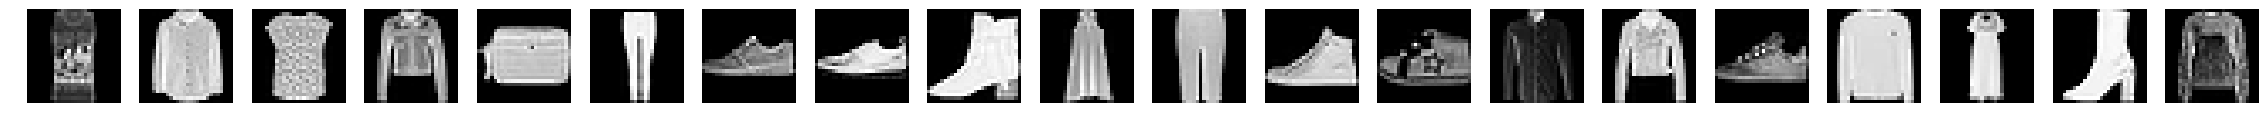

In [15]:
sample_size = 20

idx_s = np.random.randint(0,len(training_img), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size*2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(training_img[idx_s][i], [28,28]),cmap="gray")

In [134]:
# Set parameter
 
batch_size = 128
epochs = 25

In [ ]:
#kaggle 3
model = Sequential()
    
model.add(InputLayer(input_shape=(28,28,1)))
    
    # Normalization
model.add(BatchNormalization())
    
    # Conv + Maxpooling
model.add(Convolution2D(64, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dropout
model.add(Dropout(0.1))
    
    # Conv + Maxpooling
model.add(Convolution2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

    # Dropout
model.add(Dropout(0.3))

    # Converting 3D feature to 1D feature Vektor
model.add(Flatten())

    # Fully Connected Layer
model.add(Dense(256, activation='relu'))

    # Dropout
model.add(Dropout(0.5))
    
    # Fully Connected Layer
model.add(Dense(64, activation='relu'))
    
    # Normalization
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['accuracy'])


model.summary()

In [ ]:
#kaggle 3
model.fit(
        training_img,
        training_lab,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1,
        validatx_valididy_valid(x_valid, y_valid),
        callbacks=[
            #early_stopping,
            checkpoint
        ]
    )

In [ ]:
# model = Sequential()
# model.add(Dense(10, input_shape=(784,), activation='softmax'))
# model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [110]:
#kaggle 1
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [135]:
#kaggle 2
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))


model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#kaggle 2
train_model = model.fit(training_img, training_lab,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_valid, y_valid))

Train on 44800 samples, validate on 11200 samples
Epoch 1/25
44800/44800 [==============================] - 50s 1ms/step - loss: 0.7506 - acc: 0.7218 - val_loss: 0.4695 - val_acc: 0.8225
Epoch 2/25
44800/44800 [==============================] - 49s 1ms/step - loss: 0.4789 - acc: 0.8235 - val_loss: 0.3781 - val_acc: 0.8604
Epoch 3/25
44800/44800 [==============================] - 49s 1ms/step - loss: 0.4076 - acc: 0.8508 - val_loss: 0.3289 - val_acc: 0.8799
Epoch 4/25
44800/44800 [==============================] - 76s 2ms/step - loss: 0.3719 - acc: 0.8649 - val_loss: 0.3072 - val_acc: 0.8854
Epoch 5/25
44800/44800 [==============================] - 93s 2ms/step - loss: 0.3429 - acc: 0.8751 - val_loss: 0.2896 - val_acc: 0.8937
Epoch 6/25
44800/44800 [==============================] - 93s 2ms/step - loss: 0.3245 - acc: 0.8816 - val_loss: 0.2778 - val_acc: 0.8972
Epoch 7/25
31104/44800 [===================>..........] - ETA: 26s - loss: 0.3112 - acc: 0.8875

In [105]:
#google
model = Sequential()

# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 7, 7, 32)          8224      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 3, 3, 32)          4128      
__________

In [114]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [115]:
train_model = model.fit(training_img, training_lab, epochs=epochs, verbose=2, validation_data=(x_valid, y_valid))

Train on 44800 samples, validate on 11200 samples
Epoch 1/20
 - 608s - loss: 0.8712 - acc: 0.6916 - val_loss: 0.5881 - val_acc: 0.7804
Epoch 2/20
 - 499s - loss: 1.4097 - acc: 0.6630 - val_loss: 0.8308 - val_acc: 0.6808
Epoch 3/20
 - 363s - loss: 3.2525 - acc: 0.4634 - val_loss: 1.1820 - val_acc: 0.5292
Epoch 4/20
 - 363s - loss: 6.6699 - acc: 0.2475 - val_loss: 1.9772 - val_acc: 0.2581
Epoch 5/20
 - 362s - loss: 3.0843 - acc: 0.1958 - val_loss: 2.3108 - val_acc: 0.0967
Epoch 6/20
 - 362s - loss: 2.8434 - acc: 0.1718 - val_loss: 2.3210 - val_acc: 0.1591
Epoch 7/20
 - 362s - loss: 2.8576 - acc: 0.1330 - val_loss: 2.3036 - val_acc: 0.0988
Epoch 8/20
 - 361s - loss: 2.9261 - acc: 0.1395 - val_loss: 2.3038 - val_acc: 0.0988
Epoch 9/20
 - 361s - loss: 2.6698 - acc: 0.1195 - val_loss: 2.2713 - val_acc: 0.1311
Epoch 10/20


KeyboardInterrupt: 

In [106]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.SGD(), metrics=['accuracy'])
train_model = model.fit(training_img, training_lab, epochs=epochs, verbose=2, validation_data=(x_valid, y_valid))

Train on 44800 samples, validate on 11200 samples
Epoch 1/20
 - 67s - loss: 2.0503 - acc: 0.3086 - val_loss: 1.1244 - val_acc: 0.5365
Epoch 2/20
 - 66s - loss: 0.9102 - acc: 0.6383 - val_loss: 0.8034 - val_acc: 0.6820
Epoch 3/20
 - 66s - loss: 0.7165 - acc: 0.7223 - val_loss: 0.6540 - val_acc: 0.7521
Epoch 4/20
 - 66s - loss: 0.6284 - acc: 0.7596 - val_loss: 0.5915 - val_acc: 0.7705
Epoch 5/20
 - 67s - loss: 0.5666 - acc: 0.7867 - val_loss: 0.5276 - val_acc: 0.8087
Epoch 6/20
 - 68s - loss: 0.5223 - acc: 0.8047 - val_loss: 0.5189 - val_acc: 0.8081
Epoch 7/20
 - 84s - loss: 0.4868 - acc: 0.8179 - val_loss: 0.4894 - val_acc: 0.8163
Epoch 8/20
 - 97s - loss: 0.4612 - acc: 0.8304 - val_loss: 0.4470 - val_acc: 0.8337
Epoch 9/20
 - 98s - loss: 0.4361 - acc: 0.8391 - val_loss: 0.4554 - val_acc: 0.8318
Epoch 10/20
 - 97s - loss: 0.4205 - acc: 0.8437 - val_loss: 0.4187 - val_acc: 0.8436
Epoch 11/20
 - 97s - loss: 0.4023 - acc: 0.8520 - val_loss: 0.4041 - val_acc: 0.8526
Epoch 12/20
 - 97s - los

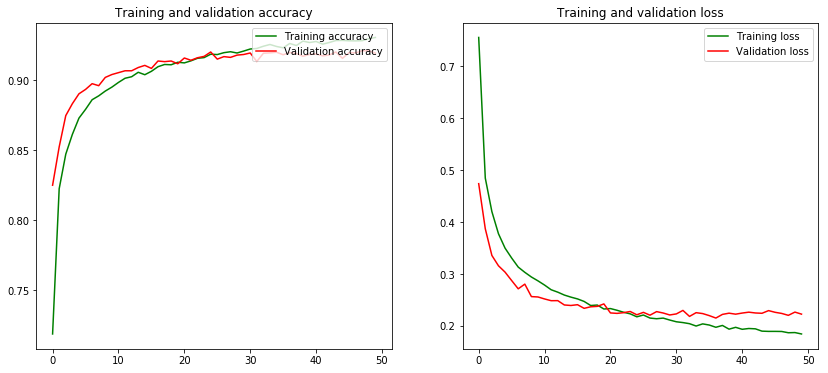

In [132]:
def plot_result(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(loc=1)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend(loc=1)
    plt.show()
    
plot_result(train_model)

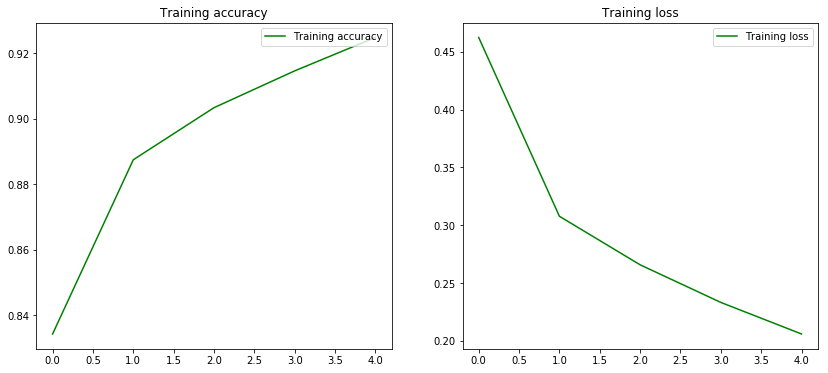

In [51]:
history = train_model.history
# plot results
hist = train_model.history
acc = hist['acc']
loss = hist['loss']
epochs = range(len(acc))
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].set_title('Training accuracy')
ax[0].legend(loc=1)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].set_title('Training loss')
ax[1].legend(loc=1)
plt.show()

In [ ]:
# result = model.predict_classes(test_img)
# np.savetxt("fmnist_result.csv", result, delimiter=",")